In [38]:
# Importing Packages

import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

In [39]:
# Reading the dataset
India = pd.read_csv('Full Dataset/India_Covid.csv')
USA = pd.read_csv('Full Dataset/USA_Covid.csv')
UK = pd.read_csv('Full Dataset/UK_Covid.csv')
Italy = pd.read_csv('Full Dataset/Italy_Covid.csv')
Belgium = pd.read_csv('Full Dataset/Belgium_Covid.csv')
France = pd.read_csv('Full Dataset/France_Covid.csv')
S_korea = pd.read_csv('Full Dataset/South_Korea_Covid.csv')

frames = [India, USA, UK, Italy, Belgium, France, S_korea]
data = pd.concat(frames)

#Converting the datatype of dates to datetime
dates = pd.to_datetime(data['Date'], format = '%Y-%m-%d')

# Adding dates to the dataframe
data['Date'] = dates

# Removing the original object datatype
# data = data.drop(labels = ['day'], axis = 1)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 100
Data columns (total 16 columns):
Date                            706 non-null datetime64[ns]
day                             706 non-null int64
month                           706 non-null int64
year                            706 non-null int64
popData2018                     706 non-null int64
Daily_total_tests               706 non-null float64
Daily_tests_per_thousand        706 non-null float64
tests_per_thousand              706 non-null float64
cases                           706 non-null int64
deaths                          706 non-null int64
Lockdown                        706 non-null int64
Public_Health                   706 non-null int64
Governance_and_socioeconomic    706 non-null int64
Humanitarian_exemption          706 non-null int64
Social_distancing               706 non-null int64
Movement_restrictions           706 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(12)
memory usage: 9

In [41]:
# Dataset Preprocessing before running the model
def dataset_preprocess(df):
    
    # Setting date as the index of the dataframe
    df = df.set_index('Date')
    
    # Creating different columns with regressor variables
#    ds = df.index.to_series()
#     df['Day'] = ds.dt.day
#     df['Month'] = ds.dt.month
 #   df['Weekday'] = ds.dt.dayofweek
#     df['Year'] = ds.dt.year
    
    # Dropping the text columns which have same entries at each row
    #df = df.drop(['countriesAndTerritories', 'geoId', 'dateRep', 'countryterritoryCode', 'year'], axis = 1)
    #df = df.drop(df.index[len(df)-1])
    
    #return the dataframe
    return(df)

In [42]:
# Preprocessing Datasets
UK_updated = dataset_preprocess(UK)
Belgium_updated  = dataset_preprocess(Belgium)
USA_updated = dataset_preprocess(USA)
Italy_updated = dataset_preprocess(Italy)
# Spain_updated = dataset_preprocess(Spain)
# Germany_updated = dataset_preprocess(Germany)
France_updated = dataset_preprocess(France)
# China_updated = dataset_preprocess(China)
S_korea_updated = dataset_preprocess(S_korea)
India_updated = dataset_preprocess(India)

In [43]:
#df_filtered = USA_updated[USA_updated['cases'] > 0] 

In [44]:
India_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2019-12-31 to 2020-04-09
Data columns (total 15 columns):
day                             100 non-null int64
month                           100 non-null int64
year                            100 non-null int64
popData2018                     100 non-null int64
Daily_total_tests               100 non-null float64
Daily_tests_per_thousand        100 non-null float64
tests_per_thousand              100 non-null float64
cases                           100 non-null int64
deaths                          100 non-null int64
Lockdown                        100 non-null int64
Public_Health                   100 non-null int64
Governance_and_socioeconomic    100 non-null int64
Humanitarian_exemption          100 non-null int64
Social_distancing               100 non-null int64
Movement_restrictions           100 non-null int64
dtypes: float64(3), int64(12)
memory usage: 12.5+ KB


In [45]:
# Plotting the Confirmed Cases with Date
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data(df, label):
    sns.set(rc = {'figure.figsize':(11,4)})
    df[label].plot(linewidth = 3, color = 'purple')

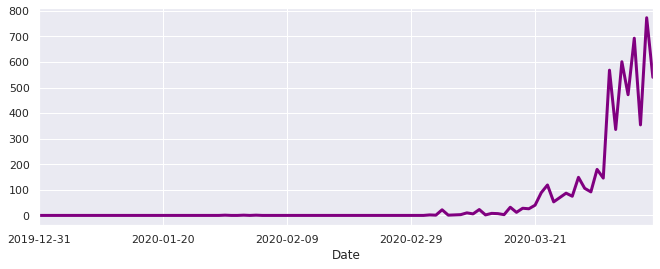

In [46]:
plot_data(India_updated, 'cases')

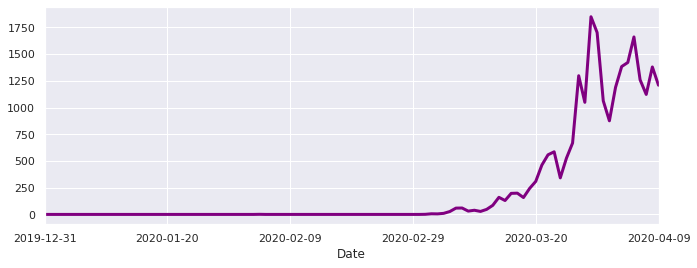

In [47]:
plot_data(Belgium_updated, 'cases')

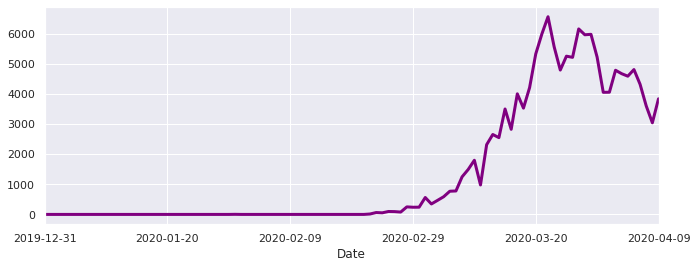

In [48]:
plot_data(Italy_updated, 'cases')

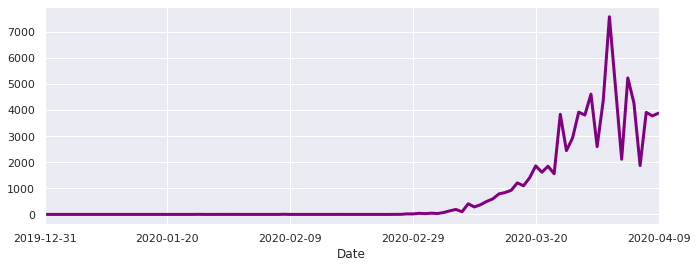

In [49]:
plot_data(France_updated, 'cases')

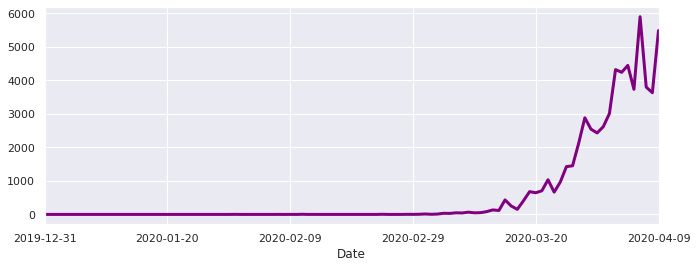

In [50]:
# plot_data(Germany_updated, 'cases')
plot_data(UK_updated, 'cases')

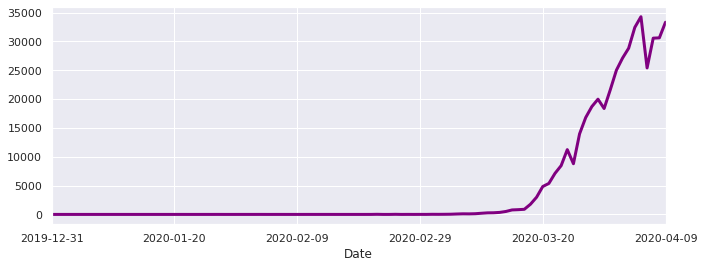

In [51]:
plot_data(USA_updated, 'cases')

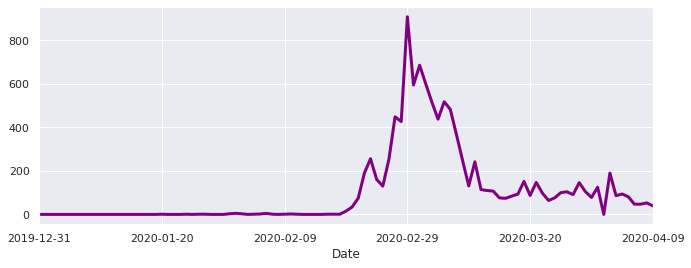

In [52]:
plot_data(S_korea_updated, 'cases')

In [27]:
USA_updated.head()

,day,month,year,popData2018,Daily_total_tests,Daily_tests_per_thousand,tests_per_thousand,cases,deaths,Lockdown,Public Health Measures,Governance and socio-economic measures,Humanitarian exemption,Social distancing,Movement restrictions
Date,,,,,,,,,,,,,,,
2019-12-31,31,12,2019,327167434,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01,1,1,2020,327167434,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,2,1,2020,327167434,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,3,1,2020,327167434,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,4,1,2020,327167434,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
USA_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 2019-12-31 to 2020-04-09
Data columns (total 15 columns):
day                             101 non-null int64
month                           101 non-null int64
year                            101 non-null int64
popData2018                     101 non-null int64
Daily_total_tests               101 non-null int64
Daily_tests_per_thousand        101 non-null float64
tests_per_thousand              101 non-null float64
cases                           101 non-null int64
deaths                          101 non-null int64
Lockdown                        101 non-null int64
Public_Health                   101 non-null int64
Governance_and_socioeconomic    101 non-null int64
Humanitarian_exemption          101 non-null int64
Social_distancing               101 non-null int64
Movement_restrictions           101 non-null int64
dtypes: float64(2), int64(13)
memory usage: 12.6+ KB


In [60]:
# Train test split
expr1 = """ cases ~ day + month """#Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""~ day + month + year   """#Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""
expr2 = """cases ~ day + month + Daily_tests_per_thousand  + tests_per_thousand + Daily_total_tests"""
expr3 = """cases ~ day + month + Daily_tests_per_thousand  + tests_per_thousand + Daily_total_tests + Lockdown + Public_Health + Movement_restrictions"""
expr4 = """cases ~ day + month + Daily_tests_per_thousand  + tests_per_thousand + Daily_total_tests + Lockdown + Public_Health + Movement_restrictions + Governance_and_socioeconomic + Humanitarian_exemption + Social_distancing"""

def train_test_split(df,ratio, expr):
    mask = np.random.rand(len(df)) < ratio
    df_train = df[mask]
    df_test = df[~mask]
    print('Training data set length='+str(len(df_train)))
    print('Testing data set length='+str(len(df_test)))
    
#     # Expression for the Model 
#     expr1 = """ cases cases ~ day + month + year   """#Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""~ day + month + year   """#Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""
#     expr2 = """cases ~ day + month + year + Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""
#     expr3 = """cases ~ day + month + year + Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests + popData2018"""

    ## Matrix Formation
    y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
    y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')
    return X_train, y_train, X_test, y_test

def train_model(y_train, X_train):
    model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
    print(model.summary())
    return(model)

def predict(model, X_test):
    poisson_predictions = model.get_prediction(X_test)
    #.summary_frame() returns a pandas DataFrame
    predictions_summary_frame = poisson_predictions.summary_frame()
    print(predictions_summary_frame)
    return(predictions_summary_frame)
    
    
def plot_results(predictions_summary_frame,X_test, y_test, country, label):
    predicted_counts=predictions_summary_frame['mean']
    actual_counts = y_test[label]
    fig = plt.figure()
    fig.suptitle(str('Predicted Mean of Covid 19 Cofirmed Cases Count'))
    predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
    actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
    plt.legend(handles=[predicted, actual])
    plt.show()
    return(predicted_counts, actual_counts)
    
def plot_actual_vs_output(predicted_counts, actual_counts):
    plt.clf()
    fig = plt.figure()
    fig.suptitle('Scatter plot of Actual versus Predicted counts')
    plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
    plt.xlabel('Predicted counts')
    plt.ylabel('Actual counts')
    plt.show()

## INDIA MODEL: Poisson Regression for confirmed Cases Count

## Plotting the Correlation Graph

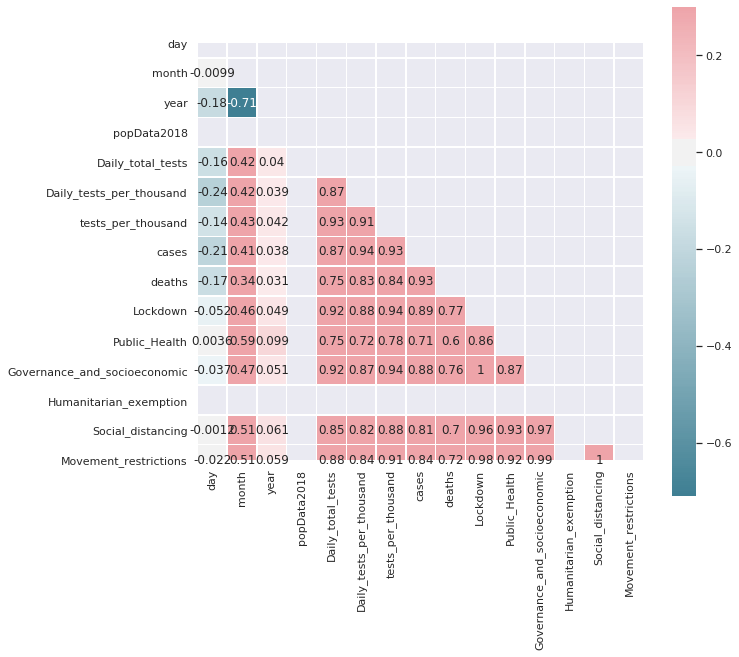

In [61]:
# Compute the correlation matrix
corr = India_updated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### STEP 1: TEST TRAIN SPLIT

In [70]:
df_filtered = India_updated[India_updated['cases'] > 0] 
X_train, y_train, X_test, y_test = train_test_split(df_filtered,0.8, expr3) 

Training data set length=32
Testing data set length=8


### STEP 2: MODEL TRAINING AND SUMMARY

In [71]:
model_India = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   32
Model:                            GLM   Df Residuals:                       23
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -295.96
Date:                Sun, 19 Apr 2020   Deviance:                       423.39
Time:                        07:49:18   Pearson chi2:                     434.
No. Iterations:                     9   Covariance Type:             nonrobust
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -41.0970      7.041     -5.837      0.000     -54.897     -27.297
day       

### STEP 3: PREDICTIONS

In [72]:
predictions_frame = predict(model_India, X_test)

                  mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                           
2020-03-07    6.204440   0.859501       4.729178       8.139908
2020-03-13    7.673676   1.065518       5.845356      10.073862
2020-03-17   20.217670   2.136537      16.435348      24.870430
2020-03-18   28.906990   2.221628      24.864764      33.606354
2020-03-20   49.165368   3.388062      42.953808      56.275182
2020-03-24   72.372335   3.112384      66.522188      78.736960
2020-04-06  510.252849  11.466350     488.266945     533.228745
2020-04-07  568.567296  12.108591     545.323377     592.801966


### STEP 4: PLOTTING THE RESULTS

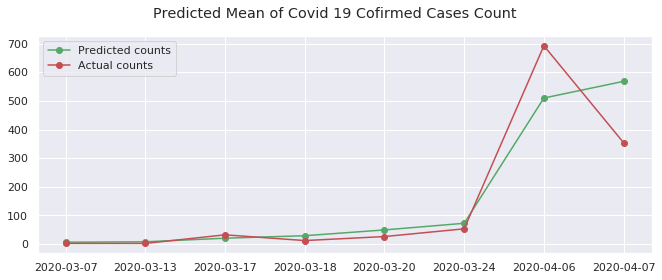

6.204439590027267 2.0
7.673676337744297 2.0
20.217669575937986 32.0
28.90698982573555 12.0
49.165367577131285 26.0
72.37233457431796 53.0
510.25284942807355 693.0
568.5672959691773 354.0


In [73]:
predicted_counts, actual_counts = plot_results(predictions_frame,X_test, y_test, India, 'cases')
for i in range(len(predicted_counts.index)): 
    print(predicted_counts[i], actual_counts[i])

## USA MODEL: Poisson Regression for confirmed Cases Count

## Plotting the Correlation Graph

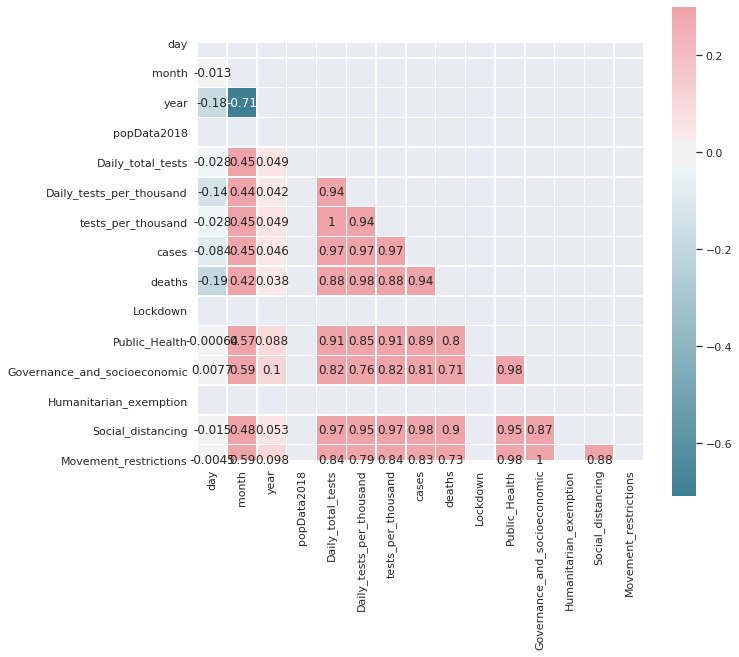

In [74]:
# Compute the correlation matrix
corr = USA_updated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### STEP 1: TEST TRAIN SPLIT

In [85]:
df_filtered = USA_updated[USA_updated['cases'] > 0] 
X_train, y_train, X_test, y_test = train_test_split(df_filtered,0.8, expr4) 

Training data set length=44
Testing data set length=13


### STEP 2: MODEL TRAINING AND SUMMARY

In [86]:
model_USA = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   44
Model:                            GLM   Df Residuals:                       34
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1388.3
Date:                Sun, 19 Apr 2020   Deviance:                       2453.0
Time:                        07:50:28   Pearson chi2:                 2.45e+03
No. Iterations:                    12   Covariance Type:             nonrobust
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -7.0192      1.147     -6.122      0.000      -9.266      -4.77

### STEP 3: PREDICTIONS

In [89]:
predictions_frame = predict(model_USA, X_test)

                    mean     mean_se  mean_ci_lower  mean_ci_upper
Date                                                              
2020-01-27      1.205005    0.298912       0.741038       1.959463
2020-02-03      3.623739    0.738690       2.430197       5.403463
2020-02-21      4.532643    0.446889       3.736188       5.498881
2020-02-29      9.004392    0.684123       7.758594      10.450227
2020-03-01     19.026084    1.698791      15.971575      22.664757
2020-03-03     26.345918    1.914619      22.848334      30.378905
2020-03-15    491.687863   10.146578     472.197743     511.982443
2020-03-21   5999.871517   64.250996    5875.254231    6127.132001
2020-03-22   6344.770924   58.100604    6231.911654    6459.674064
2020-03-24  10517.341859   58.044882   10404.189070   10631.725262
2020-03-28  17427.820412   74.040881   17283.305458   17573.543732
2020-03-29  17682.166330   67.886894   17549.609823   17815.724069
2020-04-09  29680.393249  154.834990   29378.468410   29985.42

### STEP 4: PLOTTING THE RESULTS

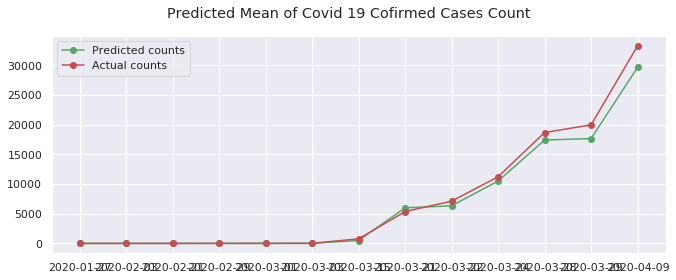

In [90]:
predicted_counts, actual_counts = plot_results(predictions_frame,X_test, y_test, USA, 'cases')

## UK MODEL: Poisson Regression for confirmed Cases Count

## Plotting the Correlation Graph

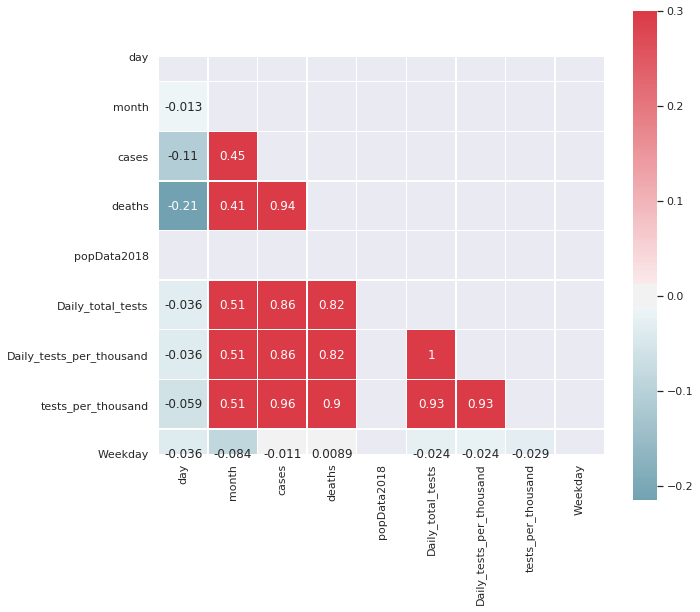

In [91]:
# Compute the correlation matrix
corr = UK_updated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### STEP 1: TEST TRAIN SPLIT

In [96]:
df_filtered = UK_updated[UK_updated['cases'] > 0] 
X_train, y_train, X_test, y_test = train_test_split(df_filtered,0.8, expr2) 

Training data set length=35
Testing data set length=13


### STEP 2: MODEL TRAINING AND SUMMARY

In [97]:
model_UK = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   35
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -497.59
Date:                Sat, 18 Apr 2020   Deviance:                       751.43
Time:                        04:49:52   Pearson chi2:                 2.51e+03
No. Iterations:                     9   Covariance Type:             nonrobust
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -21.6696      0.443    -48.896      0.000     -22.538     -20.801
day       

### STEP 3: PREDICTIONS

In [98]:
predictions_frame = predict(model_UK, X_train)

                   mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                            
2020-01-31     0.002672   0.000498       0.001854       0.003852
2020-02-09     0.030647   0.004542       0.022921       0.040976
2020-02-11     0.053568   0.007511       0.040696       0.070511
2020-02-13     0.075760   0.010109       0.058326       0.098404
2020-02-24     1.202683   0.108407       1.007920       1.435081
2020-02-28     3.215072   0.241271       2.775321       3.724501
2020-03-01     9.416879   0.571610       8.360623      10.606581
2020-03-02    11.467037   0.687556      10.195621      12.897001
2020-03-03    15.250474   0.829642      13.708093      16.966397
2020-03-04    21.246471   1.079795      19.232102      23.471825
2020-03-05    22.498513   1.087682      20.464579      24.734596
2020-03-06    27.012915   1.251248      24.668542      29.580086
2020-03-07    37.638369   1.556253      34.708491      40.815569
2020-03-09    52.645059  

### STEP 4: PLOTTING THE RESULTS

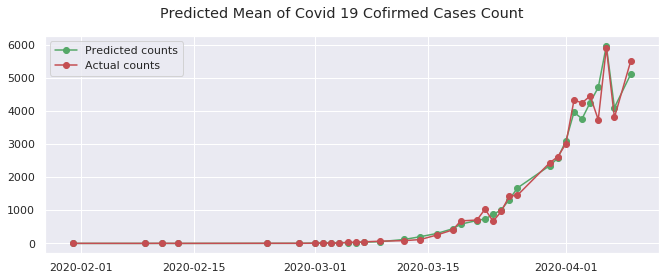

In [99]:
predicted_counts, actual_counts = plot_results(predictions_frame,X_train, y_train, UK, 'cases')

## South Korea MODEL: Poisson Regression for confirmed Cases Count

## Plotting the Correlation Graph

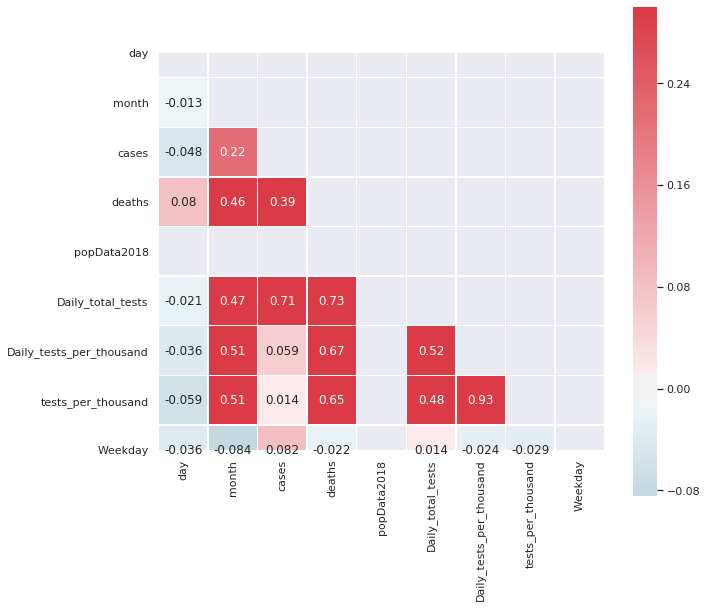

In [37]:
# Compute the correlation matrix
corr = S_korea_updated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [1]:
df_filtered = S_korea_updated[S_korea_updated['Daily_total_tests'] > 15000] 
X_train, y_train, X_test, y_test = train_test_split(df_filtered,1, expr1) 

NameError: name 'S_korea_updated' is not defined

#### STEP 2: MODEL TRAINING AND SUMMARY

In [106]:
model_S_Korea = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   27
Model:                            GLM   Df Residuals:                       23
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -719.07
Date:                Sat, 18 Apr 2020   Deviance:                       1251.8
Time:                        05:22:40   Pearson chi2:                 1.21e+03
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4208      0.127     97.557      0.000      12.171      12.670
day           -0.0783      0.002    -43.766      0.0

### STEP 3: PREDICTIONS

In [107]:
predictions_frame = predict(model_S_Korea, X_train)

                  mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                           
2020-02-27  596.644767  13.843015     570.120607     624.402932
2020-02-28  570.730325  12.960997     545.884285     596.707237
2020-02-29  545.941440  13.116036     520.830330     572.263248
2020-03-01  677.531308  18.130158     642.912610     714.014108
2020-03-02  511.370462  13.938820     484.767817     539.432983
2020-03-03  489.159791  10.783192     468.475191     510.757679
2020-03-04  467.913811   8.277765     451.967738     484.422484
2020-03-06  428.150138   6.337908     415.906540     440.754167
2020-03-07  409.554028   7.073336     395.922560     423.654822
2020-03-08  391.765613   8.415948     375.613089     408.612747
2020-03-10  282.844473   5.378194     272.497411     293.584425
2020-03-11  270.559513   4.060183     262.717591     278.635511
2020-03-12  258.808134   3.402970     252.223644     265.564517
2020-03-13  247.567160   3.541341     24

### STEP 4: PLOTTING THE RESULTS

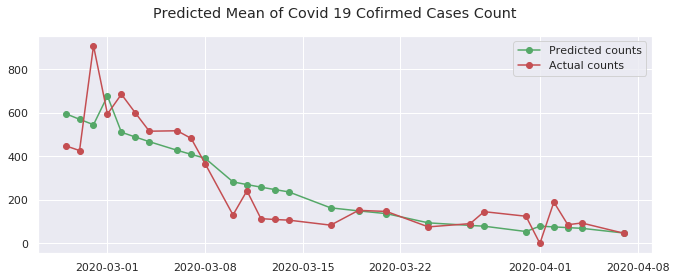

In [108]:
predicted_counts, actual_counts = plot_results(predictions_frame, X_train, y_train, S_korea, 'cases')

## ITALY MODEL: Poisson Regression for confirmed Cases Count

## Plotting the Correlation Graph

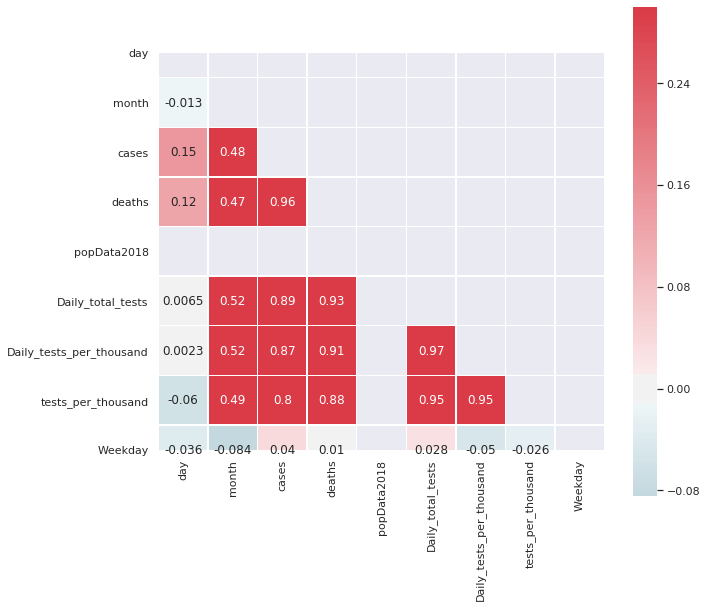

In [42]:
# Compute the correlation matrix
corr = Italy_updated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### STEP 1: TEST TRAIN SPLIT

In [43]:
df_filtered = Italy_updated[Italy_updated['cases'] > 0 ] 
X_train, y_train, X_test, y_test = train_test_split(df_filtered,0.8, expr3) 

Training data set length=37
Testing data set length=12


### STEP 2: MODEL TRAINING AND SUMMARY

In [44]:
model_Italy = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   37
Model:                            GLM   Df Residuals:                       30
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1099.8
Date:                Fri, 17 Apr 2020   Deviance:                       1864.7
Time:                        23:17:37   Pearson chi2:                 1.81e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -3.734e-16   1.94e-17    -19.243      0.000   -4.11e-16   -3.35e-16
day       

### STEP 3: PREDICTIONS

In [45]:
predictions_frame = predict(model_Italy, X_test)

                   mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                            
2020-01-31     0.408617   0.028902       0.355720       0.469379
2020-02-27   121.091984   3.098516     115.168776     127.319826
2020-03-03   437.844421   5.643213     426.922457     449.045801
2020-03-07  1069.445927  10.921410    1048.253156    1091.067156
2020-03-12  2094.656364  12.915158    2069.495457    2120.123177
2020-03-14  2893.791300  23.288382    2848.505003    2939.797570
2020-03-15  3412.817617  24.679021    3364.788787    3461.532009
2020-03-21  5145.839547  34.379823    5078.895595    5213.665875
2020-03-25  5253.749849  43.797301    5168.606194    5340.296096
2020-03-26  5368.680968  48.465604    5274.525556    5464.517147
2020-04-03  4594.965212  29.160725    4538.165224    4652.476114
2020-04-09  2750.562099  31.393604    2689.714883    2812.785811


### STEP 4: PLOTTING THE RESULTS

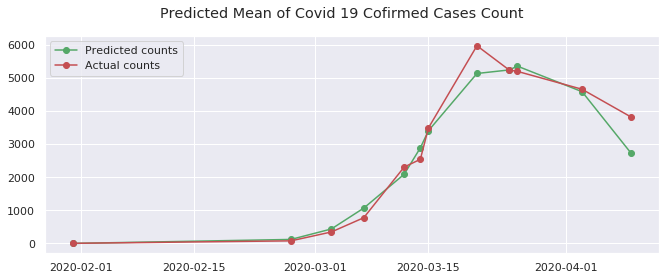

(Date
 2020-01-31       0.408617
 2020-02-27     121.091984
 2020-03-03     437.844421
 2020-03-07    1069.445927
 2020-03-12    2094.656364
 2020-03-14    2893.791300
 2020-03-15    3412.817617
 2020-03-21    5145.839547
 2020-03-25    5253.749849
 2020-03-26    5368.680968
 2020-04-03    4594.965212
 2020-04-09    2750.562099
 Name: mean, dtype: float64, Date
 2020-01-31       3.0
 2020-02-27      78.0
 2020-03-03     347.0
 2020-03-07     778.0
 2020-03-12    2313.0
 2020-03-14    2547.0
 2020-03-15    3497.0
 2020-03-21    5986.0
 2020-03-25    5249.0
 2020-03-26    5210.0
 2020-04-03    4668.0
 2020-04-09    3836.0
 Name: cases, dtype: float64)

In [46]:
plot_results(predictions_frame, y_test, Italy, 'cases')

## FRANCE MODEL: Poisson Regression for confirmed Cases Count

## Correlation Plot

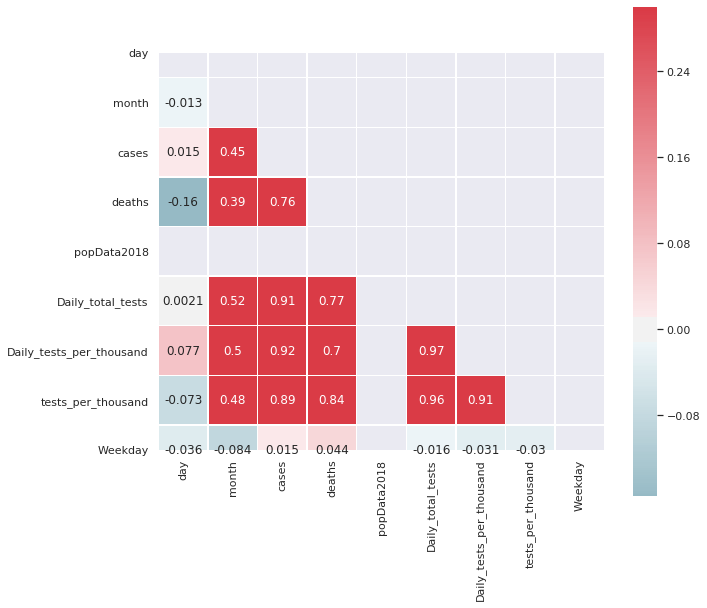

In [47]:
# Compute the correlation matrix
corr = France_updated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### STEP 1: TEST TRAIN SPLIT

In [48]:
df_filtered = France_updated[France_updated['cases'] > 0 ] 
X_train, y_train, X_test, y_test = train_test_split(df_filtered,0.8, expr2) 

Training data set length=43
Testing data set length=7


### STEP 2: MODEL TRAINING AND SUMMARY

In [49]:
model_France = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   43
Model:                            GLM   Df Residuals:                       36
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2873.6
Date:                Fri, 17 Apr 2020   Deviance:                       5428.3
Time:                        23:17:39   Pearson chi2:                 1.69e+04
No. Iterations:                    10   Covariance Type:             nonrobust
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -21.9128      1.003    -21.842      0.000     -23.879     -19.946
day       

### STEP 3: PREDICTIONS

In [50]:
predictions_frame = predict(model_France, X_test)

                   mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                            
2020-02-26     4.541438   0.450624       3.738806       5.516375
2020-03-16   929.689962  10.057960     910.184253     949.613687
2020-03-18  1193.565495  10.365856    1173.420728    1214.056098
2020-03-19  1352.273191  11.730429    1329.476317    1375.460969
2020-03-25  3949.980861  34.328723    3883.267602    4017.840231
2020-03-27  3782.623907  28.966314    3726.274900    3839.825027
2020-03-31  2328.629941  26.171817    2277.894978    2380.494911


### STEP 4: PLOTTING THE RESULTS

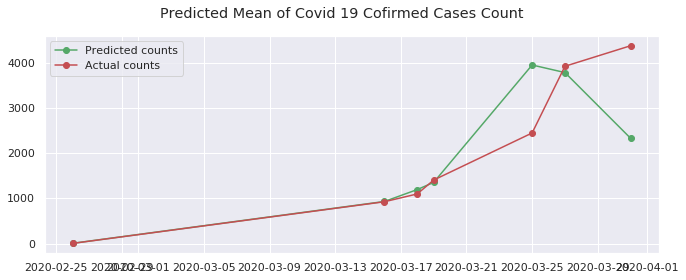

(Date
 2020-02-26       4.541438
 2020-03-16     929.689962
 2020-03-18    1193.565495
 2020-03-19    1352.273191
 2020-03-25    3949.980861
 2020-03-27    3782.623907
 2020-03-31    2328.629941
 Name: mean, dtype: float64, Date
 2020-02-26       2.0
 2020-03-16     924.0
 2020-03-18    1097.0
 2020-03-19    1404.0
 2020-03-25    2446.0
 2020-03-27    3922.0
 2020-03-31    4376.0
 Name: cases, dtype: float64)

In [51]:
plot_results(predictions_frame, y_test, France, 'cases')